<a href="https://colab.research.google.com/github/KnuckleheadNarut0/21BDS0173_EDA_DA/blob/main/21BDS0173_EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOUMYA RANJAN JENA | 21BDS0173
First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72             35        0  33.6   
1          1.0       85             66             29        0  26.6   
2          8.0      183             64              0        0  23.3   
3          1.0       89             66             23       94  28.1   
4          0.0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies  

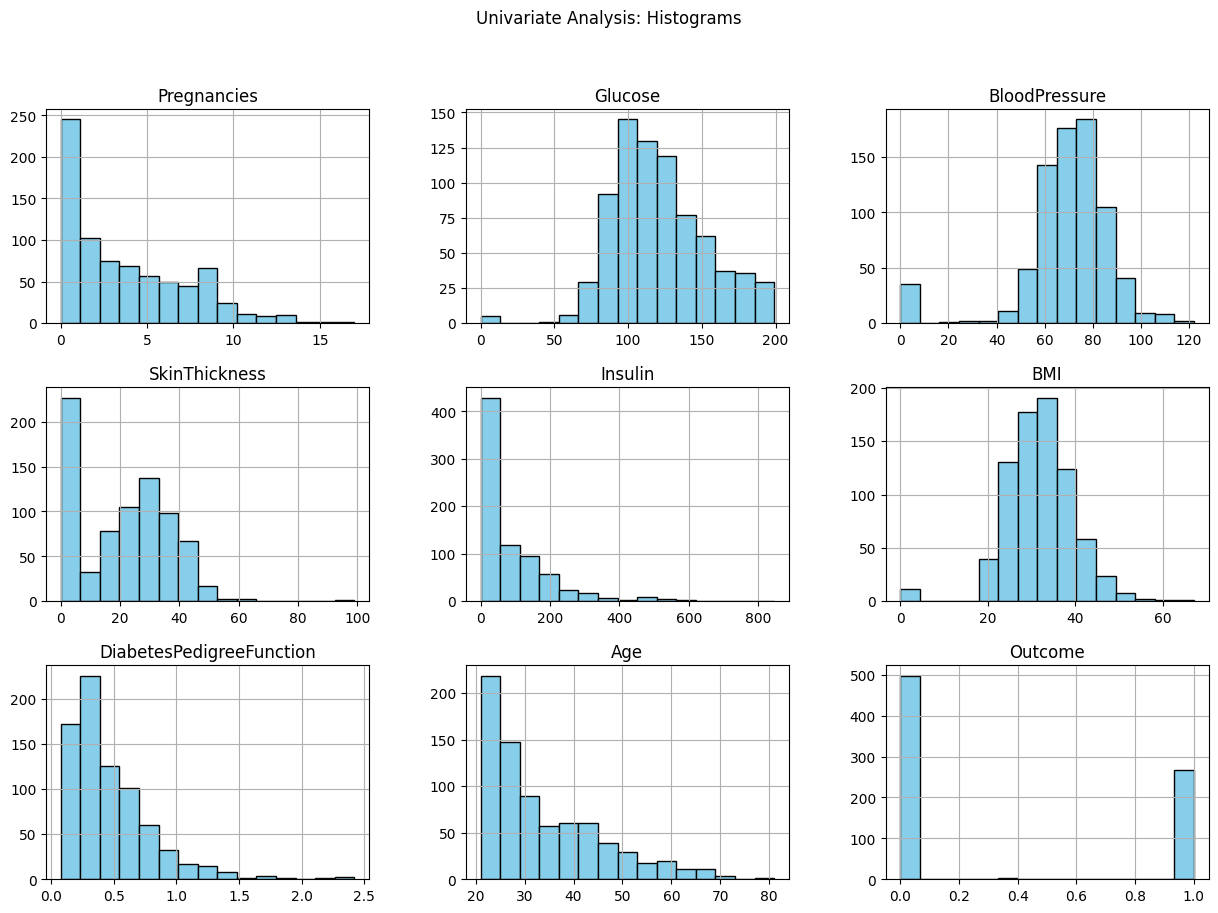

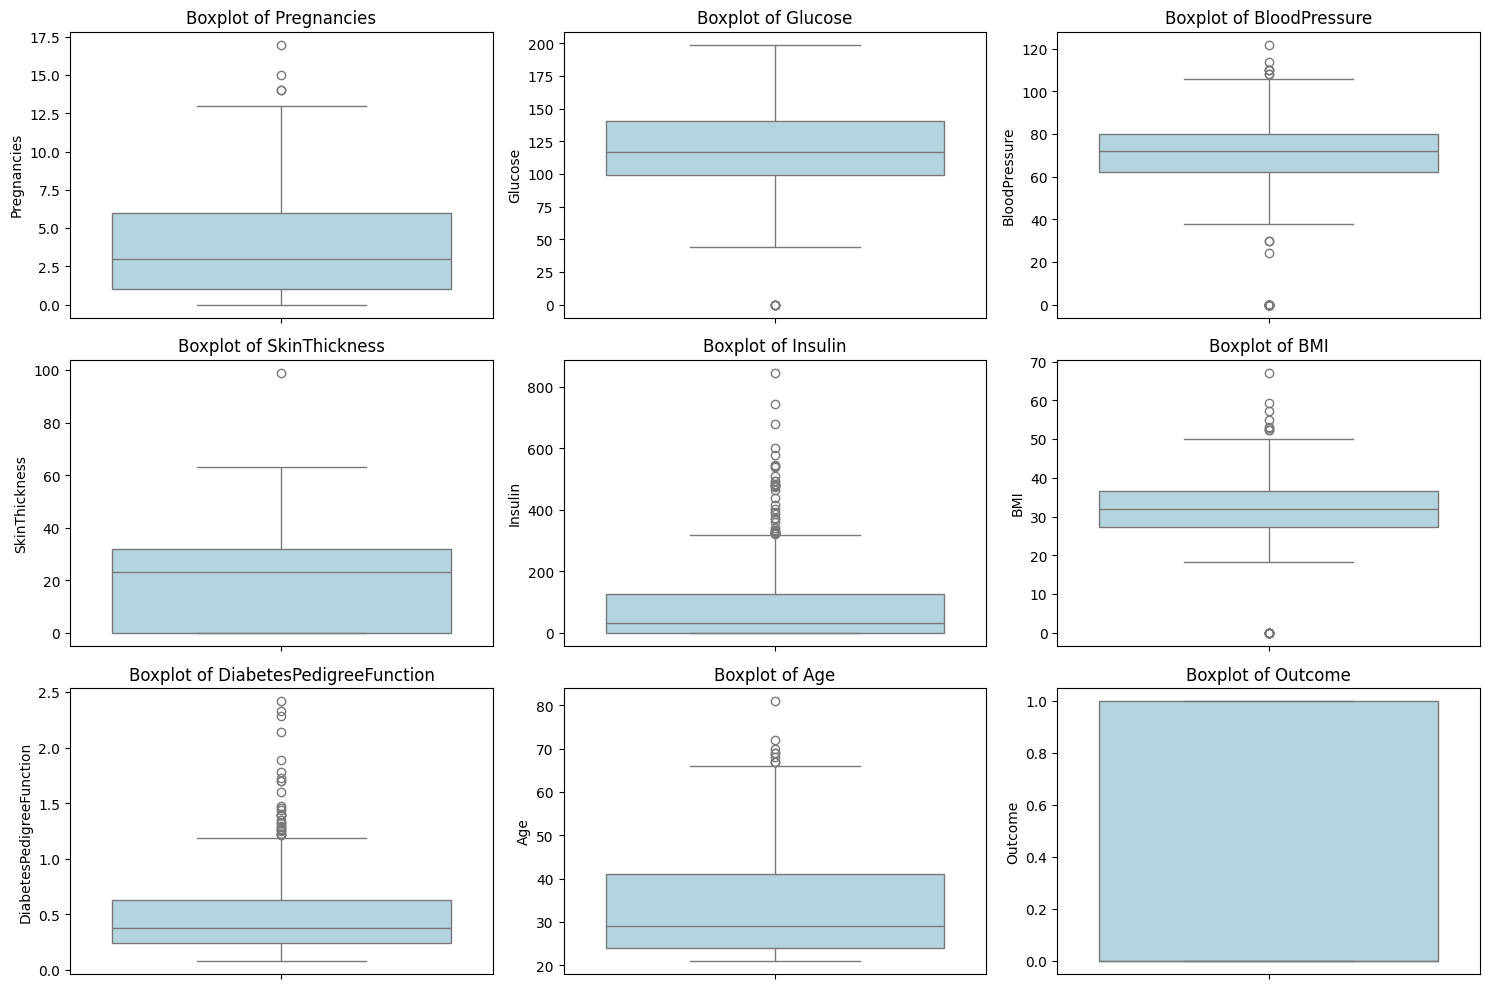

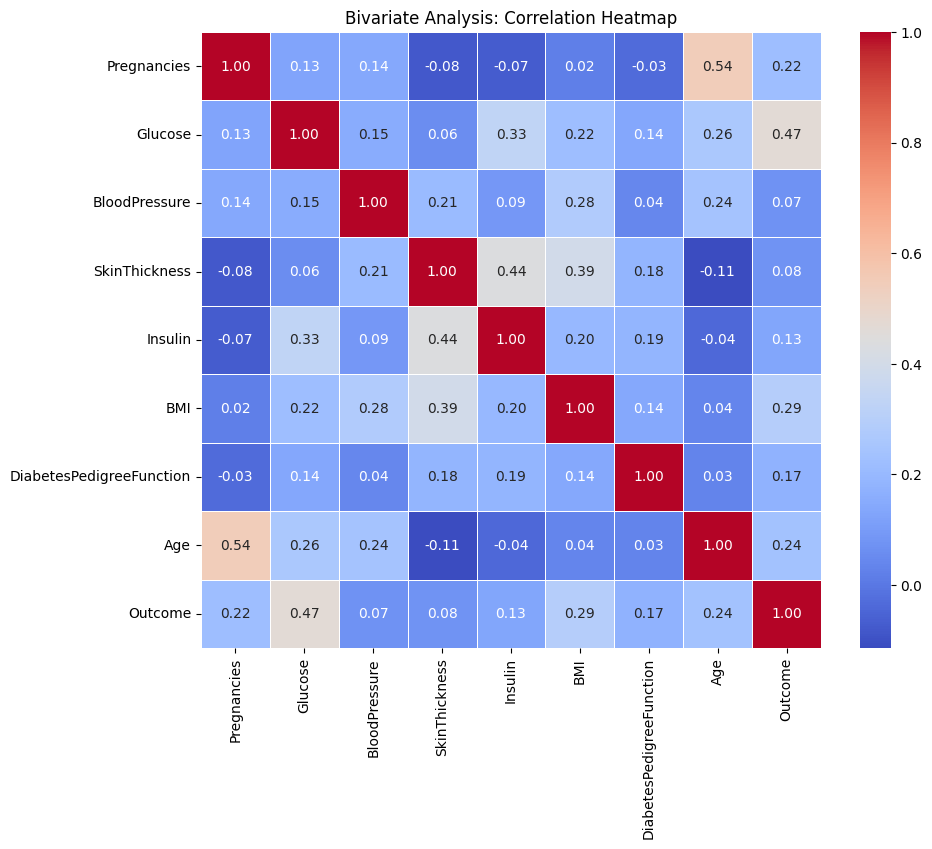

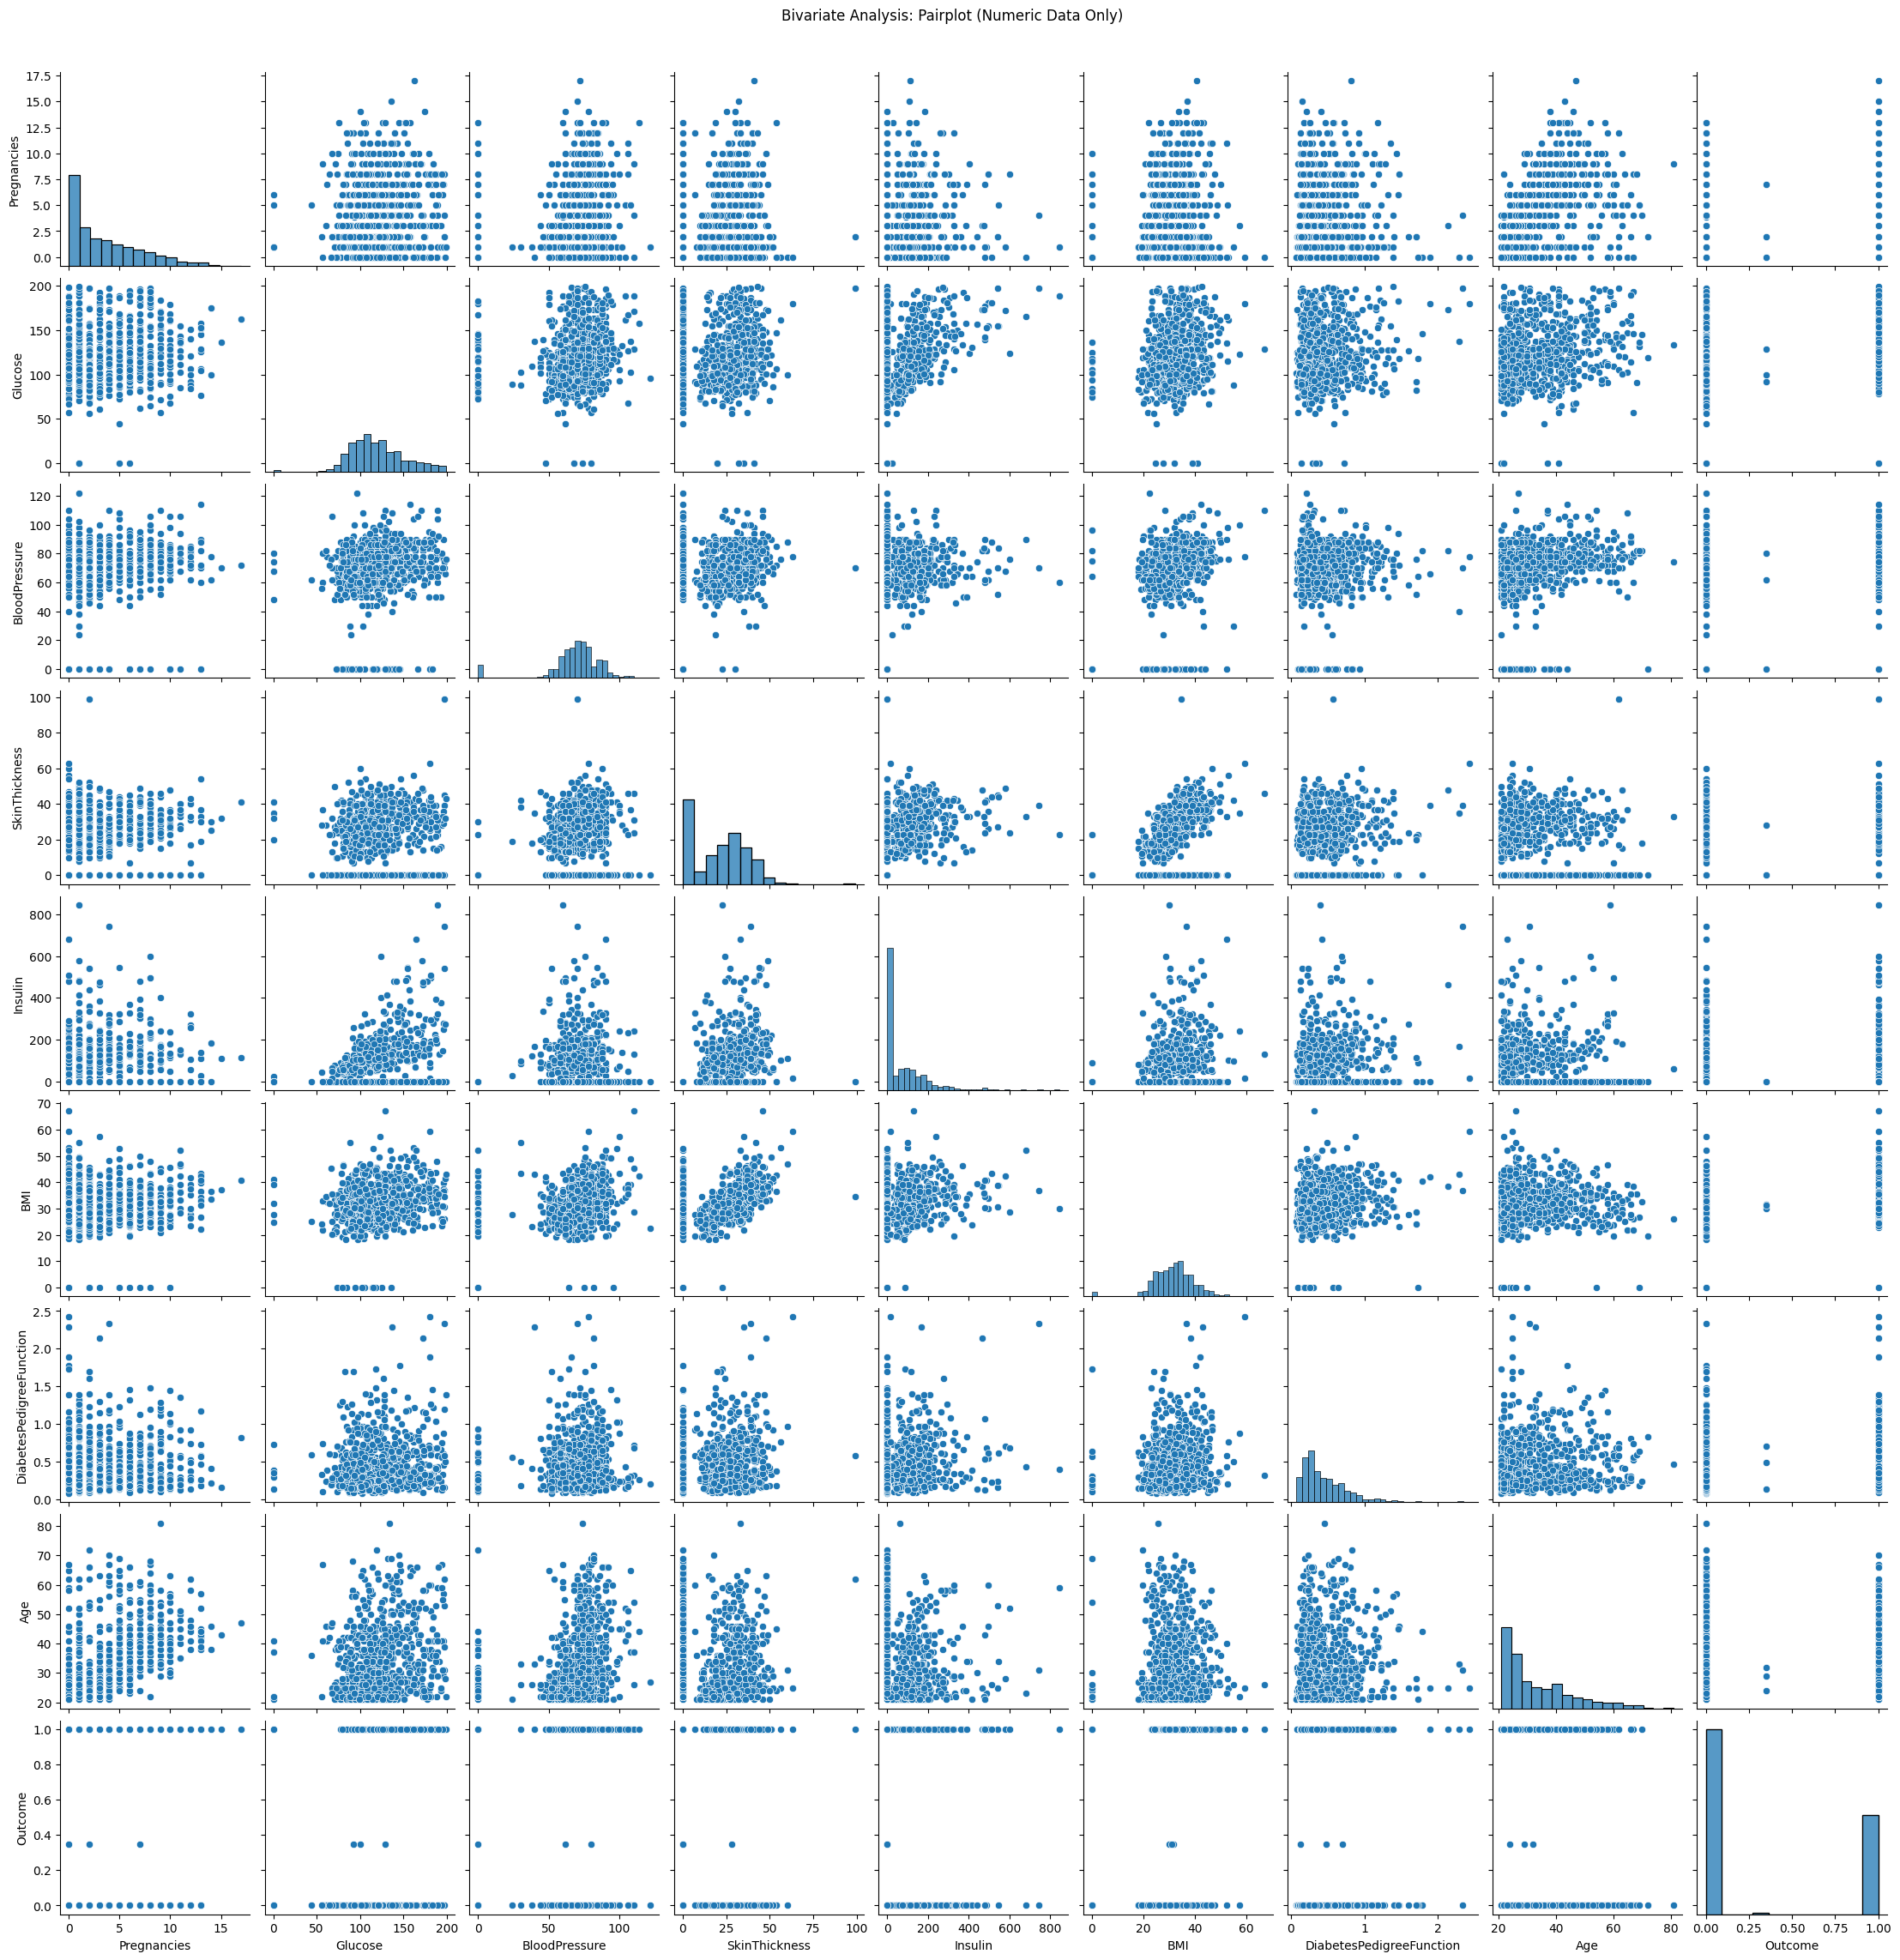

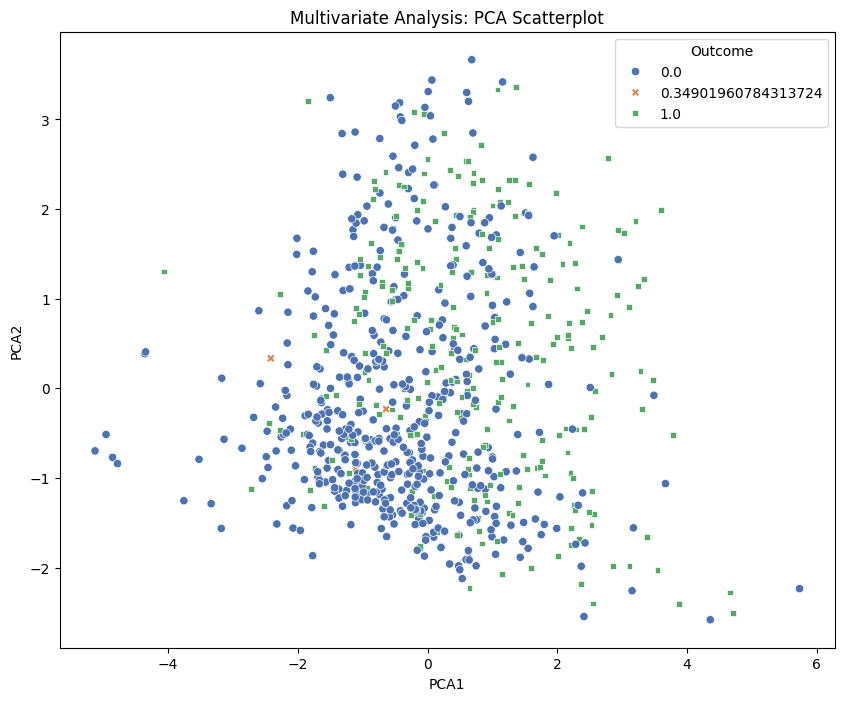


Explained Variance Ratio by PCA Components:
[0.26178466 0.21627088]


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "diabetes.csv"  # Replace with your file path
df = pd.read_csv(file_path)
print("SOUMYA RANJAN JENA | 21BDS0173")
# Step 1: Basic Exploration
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 2: Data Cleaning
# Replace non-numeric values (e.g., "?") with NaN
df.replace("?", np.nan, inplace=True)

# Convert all columns to numeric where possible, coercing invalid values to NaN
df = df.apply(pd.to_numeric, errors="coerce")

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Verify Missing Values Handled
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Step 3: Univariate Analysis
# Histograms
df.hist(figsize=(15, 10), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Univariate Analysis: Histograms")
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=["float64", "int64"]).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color="lightblue")
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

# Step 4: Bivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Bivariate Analysis: Correlation Heatmap")
plt.show()

# Pairplot for numeric data
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
sns.pairplot(df[numeric_columns])
plt.suptitle("Bivariate Analysis: Pairplot (Numeric Data Only)", y=1.02)
plt.show()

# Step 5: Multivariate Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=["Outcome"], errors="ignore"))

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2"])
if "Outcome" in df.columns:
    pca_df["Outcome"] = df["Outcome"]

# Scatter plot for PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Outcome", style="Outcome", palette="deep")
plt.title("Multivariate Analysis: PCA Scatterplot")
plt.show()

# Explained Variance
print("\nExplained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)